# Playground for Plots for Presentation Mod 3 Project
## Importing libraries and cleaning up the dataset for usuable dfs and series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import geopandas as gpd
import shapely
import numpy as np
sns.set_style('darkgrid')


In [2]:
geo_dist_df = pd.read_csv("CSV_MASTERS/Final.csv")
geo_dist_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)",Chondrite,L,Japan,JP,337.0,130.0,POINT (130.75 33.725)
1,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)",Iron,Iron,Czechia,CZ,0.0,0.0,POINT (12.73333 50.18333)
2,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (9.51667 45.48333)
3,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",Chondrite,LL,France,FR,118.0,45.0,POINT (7.35 47.86667)
4,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",Iron,IAB,Argentina,AR,16.0,6.0,POINT (-60.58333 -27.46667)


In [3]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0
    
geo_dist_df.year = geo_dist_df.year.apply(to_int)
geo_dist_df.year.astype("int64", inplace=True)

0         860
1        1399
2        1490
3        1491
4        1575
5        1583
6        1600
7        1621
8        1623
9        1628
10       1632
11       1637
12       1668
13       1671
14       1688
15       1715
16       1716
17       1723
18       1724
19       1740
20       1741
21       1749
22       1751
23       1753
24       1753
25       1766
26       1768
27       1768
28       1773
29       1775
         ... 
33020       0
33021       0
33022       0
33023       0
33024       0
33025       0
33026       0
33027       0
33028       0
33029       0
33030       0
33031       0
33032       0
33033       0
33034       0
33035       0
33036       0
33037       0
33038       0
33039       0
33040       0
33041       0
33042       0
33043       0
33044       0
33045       0
33046       0
33047       0
33048       0
33049       0
Name: year, Length: 33050, dtype: int64

In [4]:
# Filter the dataframe to be only for years greater than 1913 
year_count_df = geo_dist_df[geo_dist_df.year >= 1970]
# Creates a series that is the year and nuber of meteor_strikes
year_count = year_count_df[(year_count_df.fall == "Fell") | (year_count_df.fall == "Found")].year.value_counts()

In [5]:
#check if there are missing values anywhere before plotting takes place
pandas_profiling.ProfileReport(year_count_df)

Number of variables,18
Number of observations,30618
Total Missing (%),0.0%
Total size in memory,4.2 MiB
Average record size in memory,144.0 B
Numeric,6
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Make a plot of the number of strikes per year

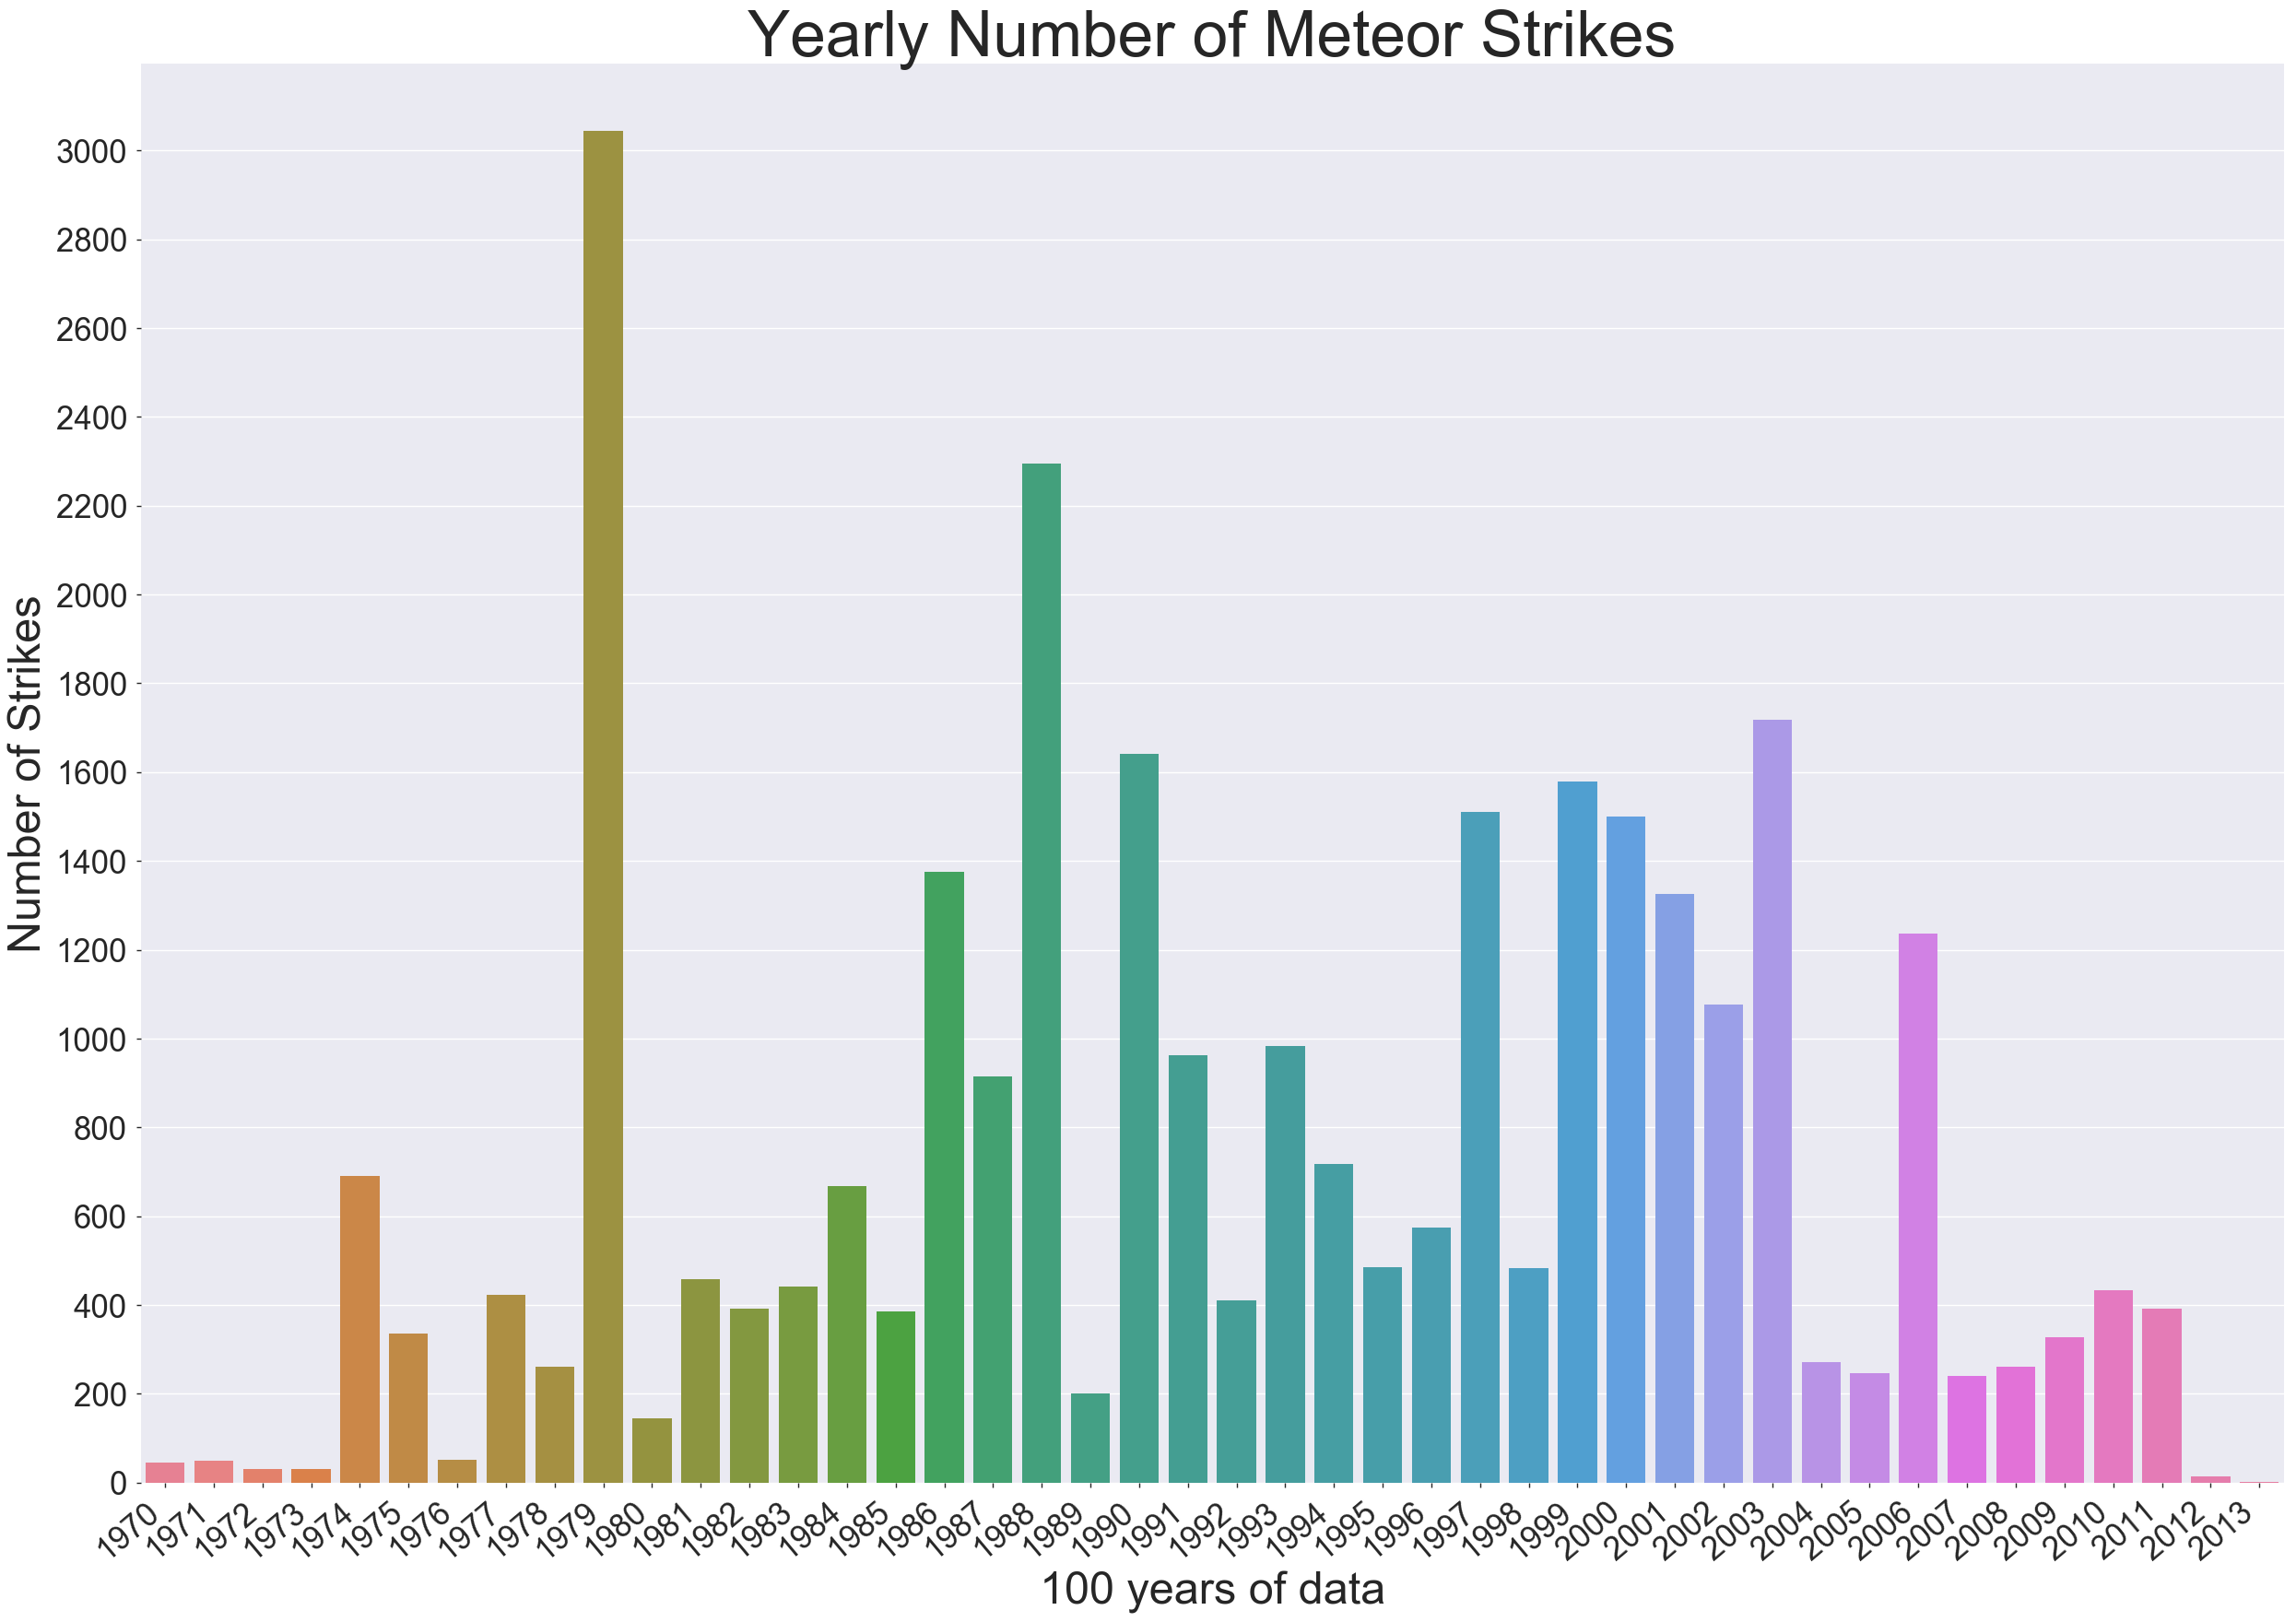

In [6]:
# Create Yearly Number of Meteor Strikes Plot
fig, ax = plt.subplots(1, figsize=(30,20))

sns.set_context("notebook")
sns.barplot(year_count.index.values, year_count.values, ax=ax, palette='husl')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.xaxis.set_major_locator(plt.MaxNLocator(50))
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlabel('100 years of data', fontsize=35)
plt.ylabel('Number of Strikes', fontsize=35)
plt.title('Yearly Number of Meteor Strikes', fontsize = 50)

plt.savefig('yearly_strikes.png')
plt.show()


## Violin plots of Found vs. Fell

In [7]:
geo_dist_df['all']=""
geo_dist_df.head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates,all
0,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725, 130.75)",Chondrite,L,Japan,JP,337.0,130.0,POINT (130.75 33.725),
1,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)",Iron,Iron,Czechia,CZ,0.0,0.0,POINT (12.73333 50.18333),


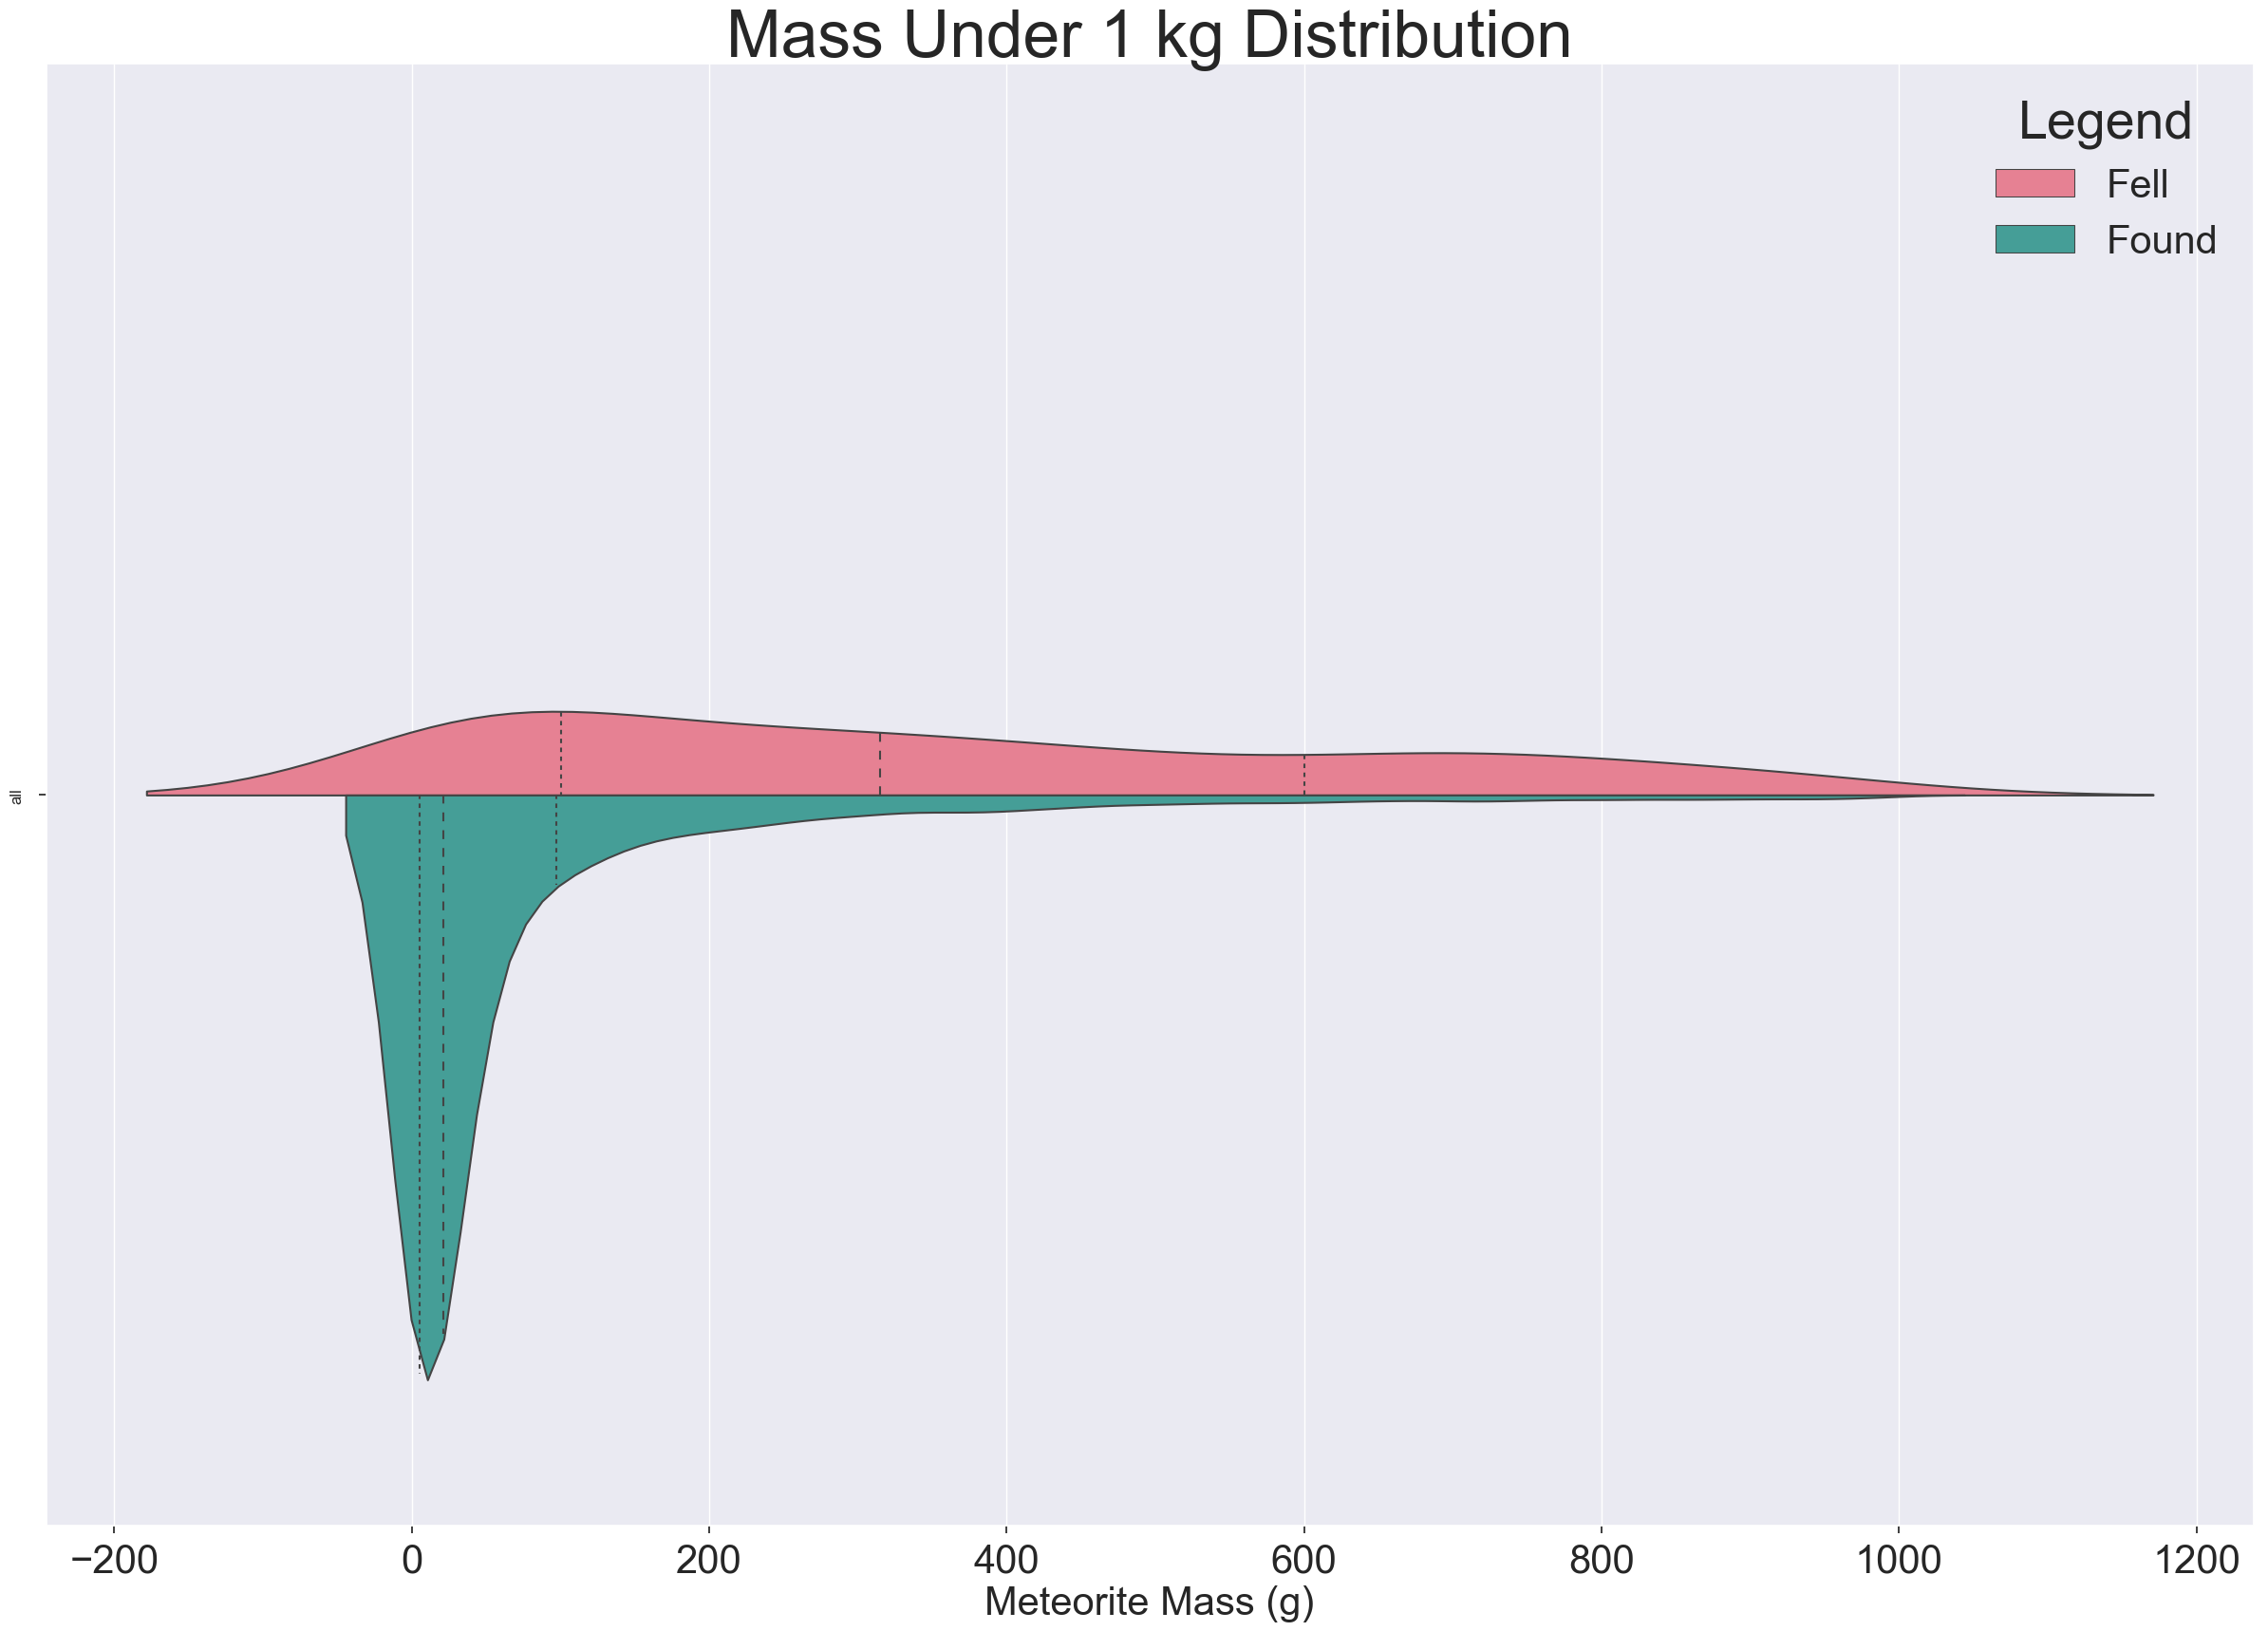

In [9]:
# Create a violin plot of the data
fig, ax = plt.subplots(1, figsize=(30,20))
sns.violinplot(x='mass', y="all", hue="fall", data = geo_dist_df[geo_dist_df.mass < 1000], split=True, inner="quartile", palette='husl')
ax.tick_params(axis='both', which='major', labelsize=30)

plt.xlabel('Meteorite Mass (g)', fontsize=30)
#plt.ylabel('Number of Strikes', fontsize=30)
plt.title('Mass Under 1 kg Distribution', fontsize = 50)
ax.legend(title = 'Legend', title_fontsize=40, fontsize = 30)

plt.savefig('violin_plot_1kg.png')
plt.show()

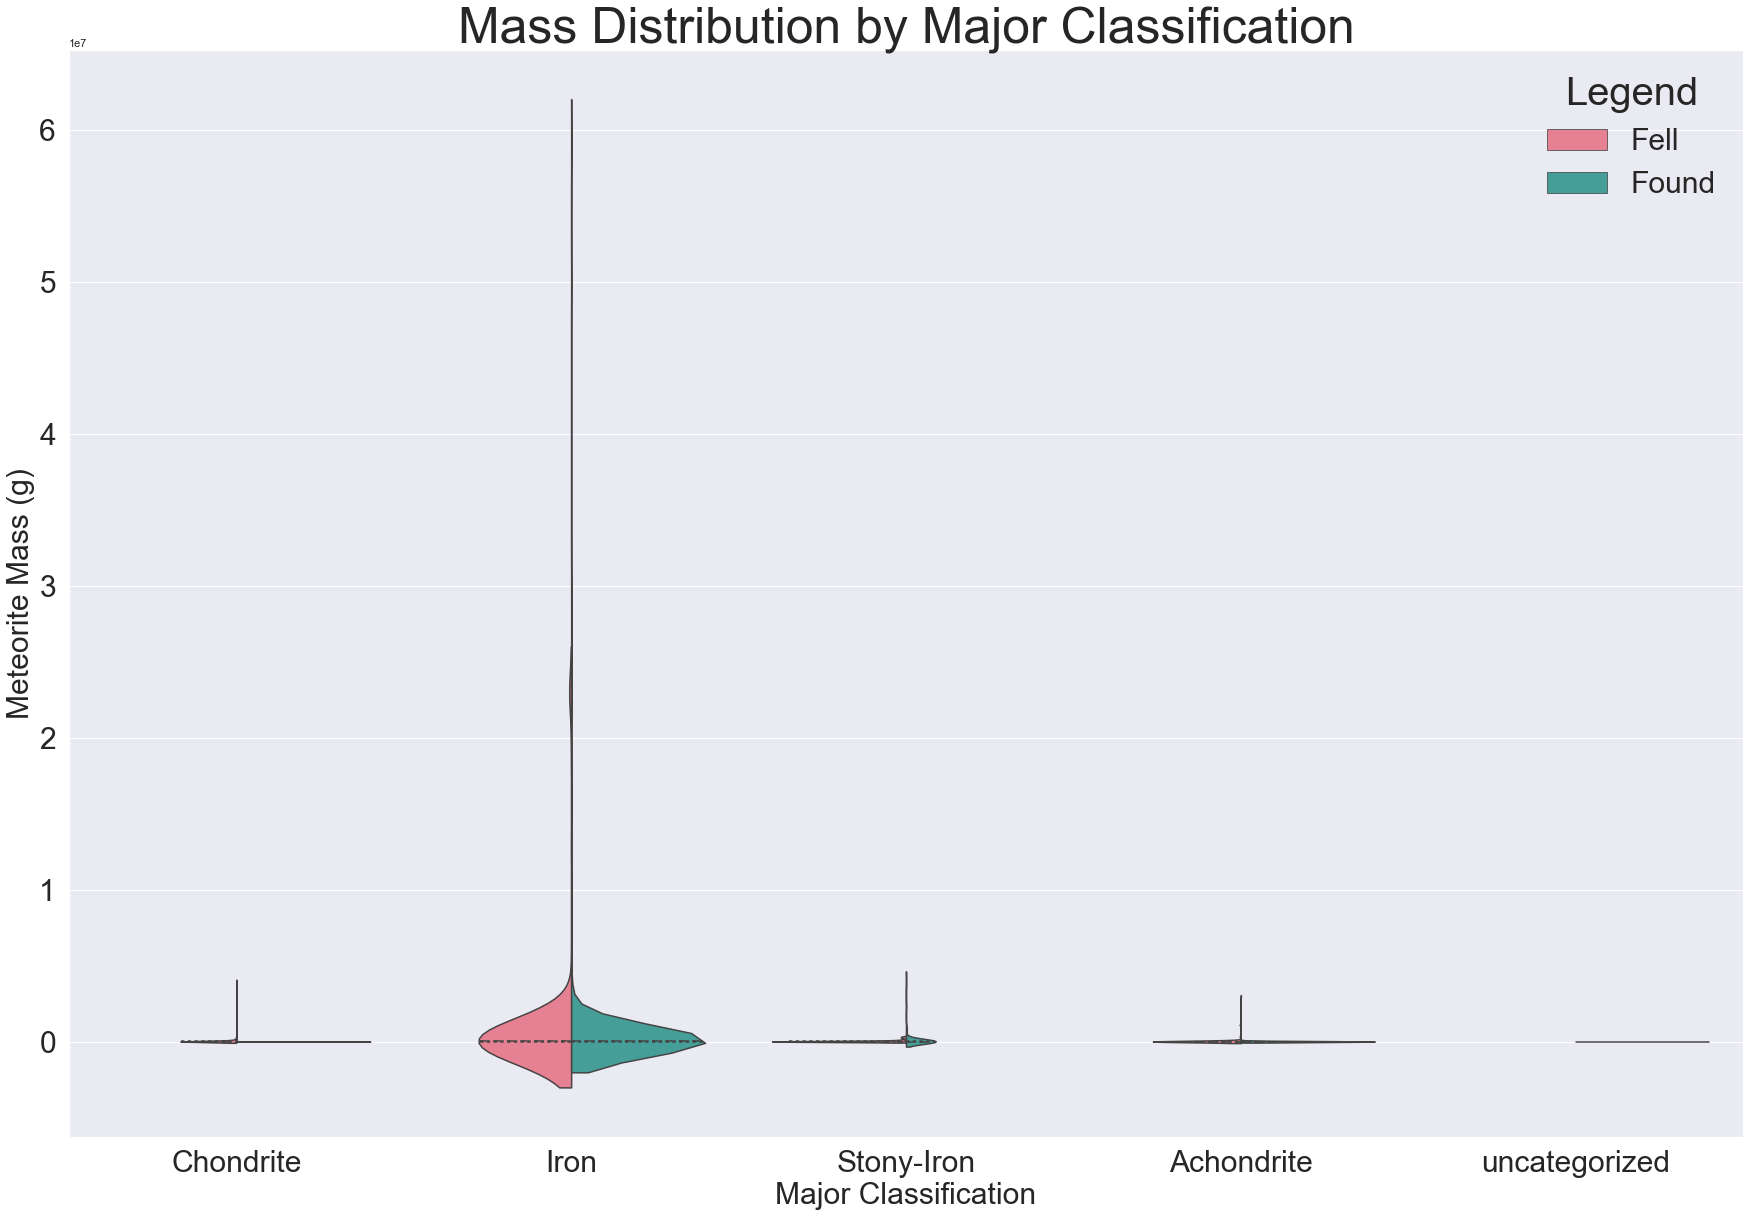

In [99]:
# Violin plots by major classification
fig, ax = plt.subplots(1, figsize=(30,20))
sns.violinplot(x ="major_classification", y = 'mass', hue="fall", data = geo_dist_df, split=True, inner="quartile", palette='husl')
ax.tick_params(axis='both', which='major', labelsize=30)

plt.xlabel('Major Classification', fontsize=30)
plt.ylabel('Meteorite Mass (g)', fontsize=30)
plt.title('Mass Distribution by Major Classification', fontsize = 50)
ax.legend(title = 'Legend', title_fontsize=40, fontsize = 30)

plt.savefig('violin_plots_classification_with_outliers.png')
plt.show()

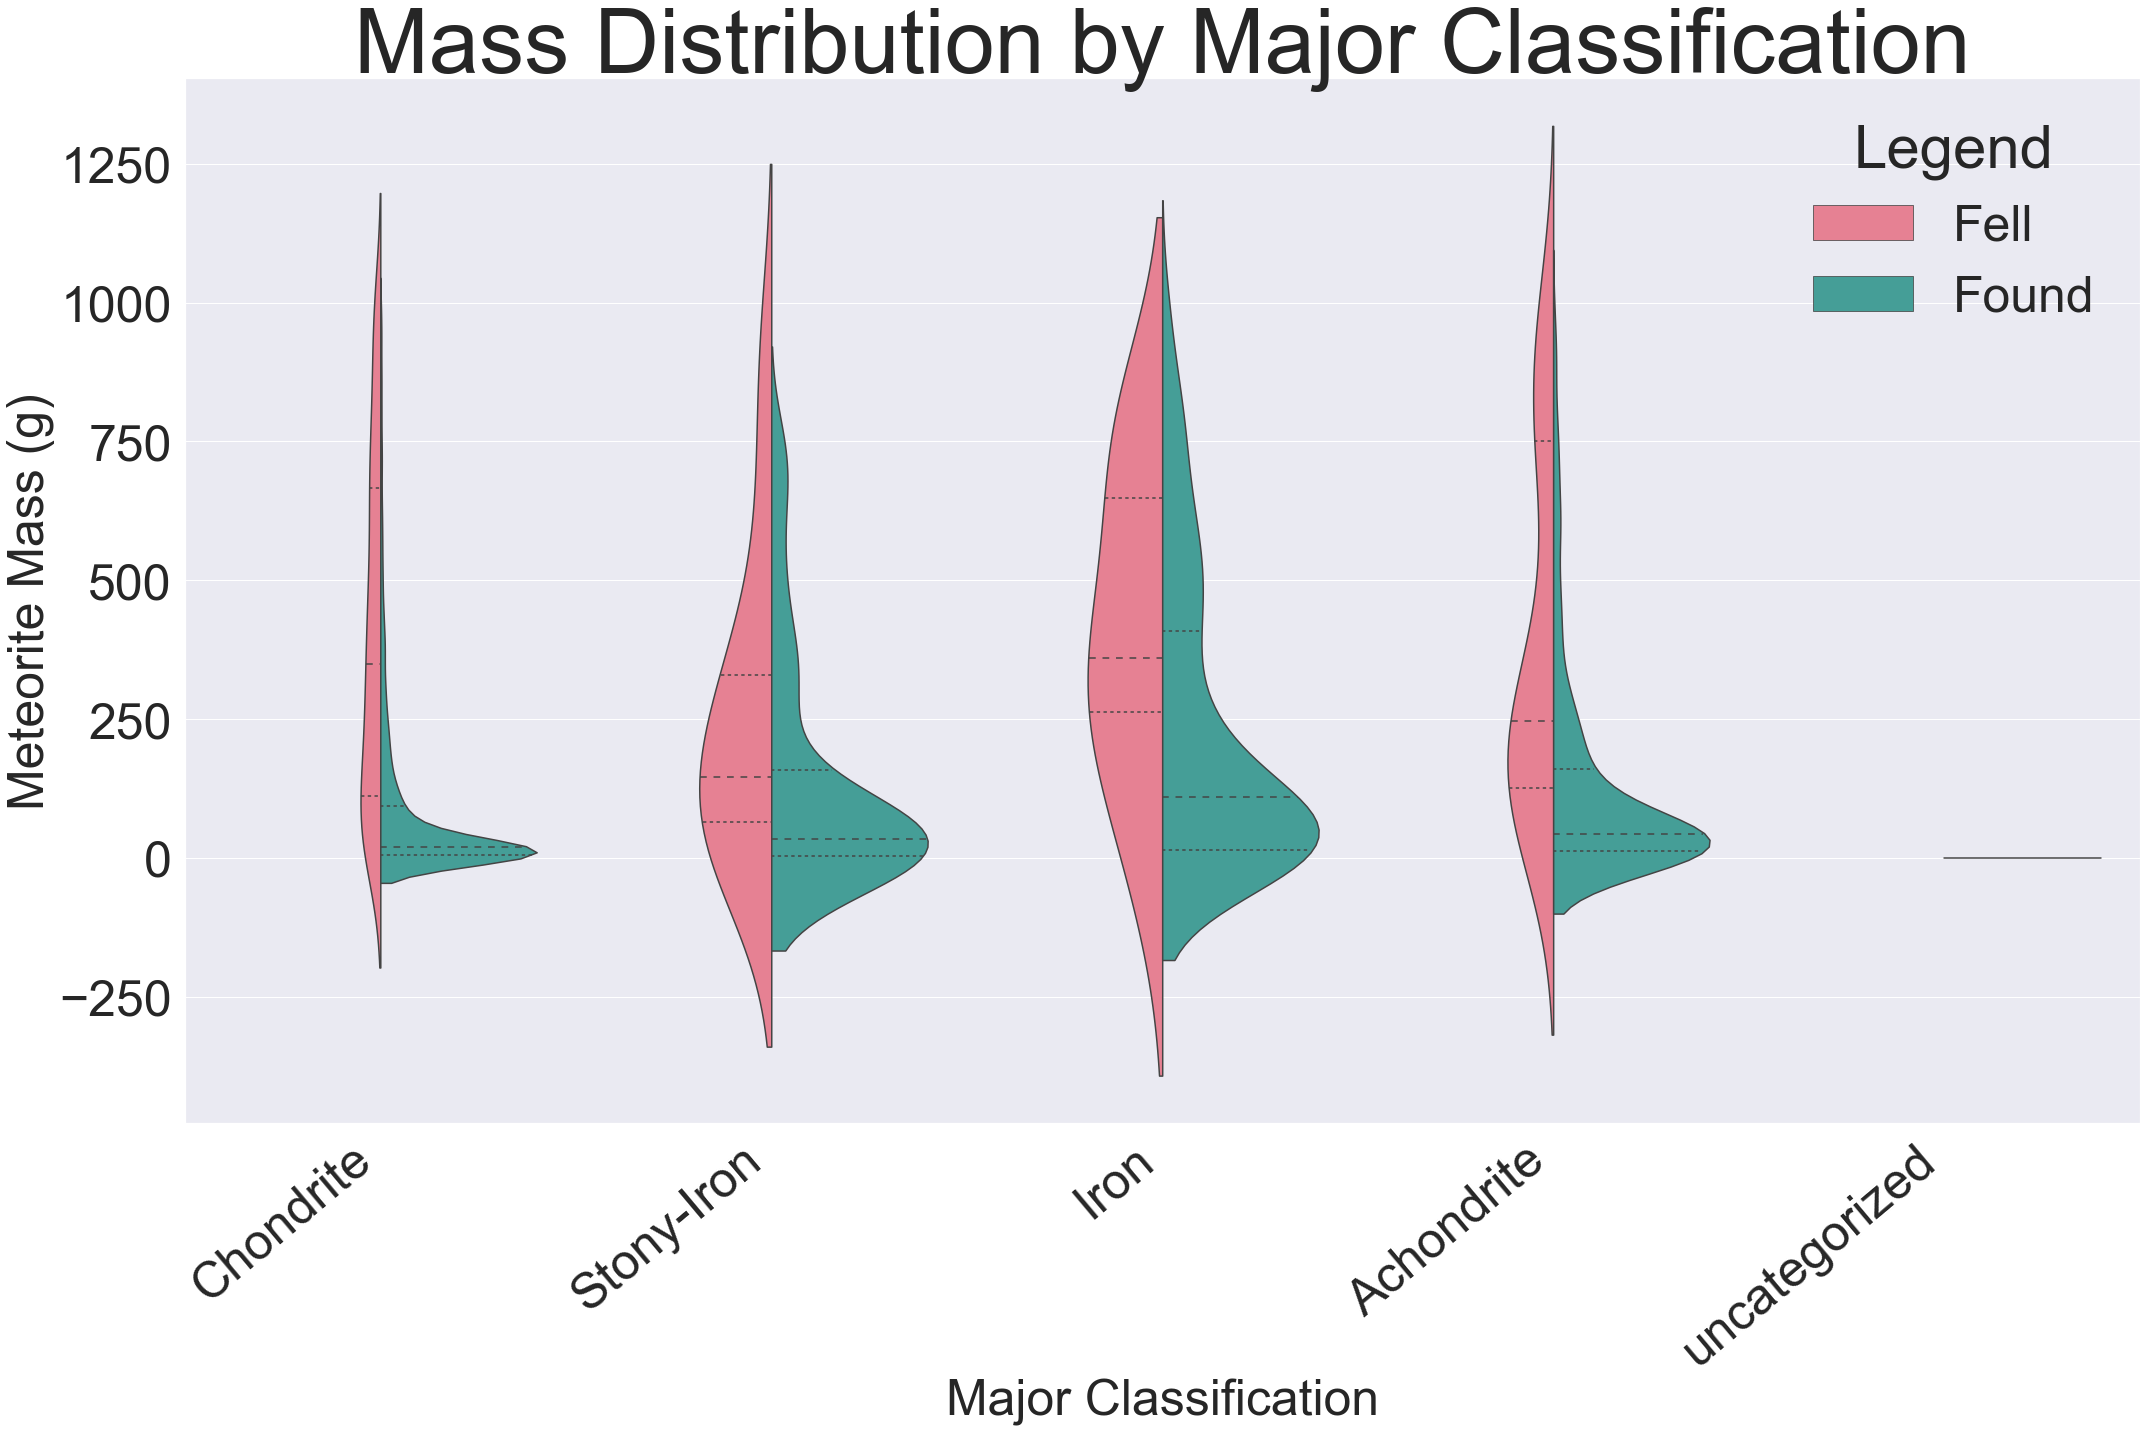

In [104]:
# Violin plots by major classification
fig, ax = plt.subplots(1, figsize=(30,20))
sns.violinplot(x ="major_classification", y = 'mass', hue="fall", data = geo_dist_df[geo_dist_df.mass <= 1000], split=True, inner="quartile", palette="husl")
ax.tick_params(axis='both', which='major', labelsize=50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Major Classification', fontsize=50)
plt.ylabel('Meteorite Mass (g)', fontsize=50)
plt.title('Mass Distribution by Major Classification', fontsize = 90)
ax.legend(title = 'Legend', title_fontsize=60, fontsize = 50)
plt.tight_layout()

plt.savefig('violin_plots_classification_1kg.png')
plt.show()

## Plot of Meteorite Findings accross the Globe

In [15]:
geo_dist_df = pd.read_csv("CSV_MASTERS/Final.csv")

# longitudes = geo_dist_df.reclong.value_counts().index
# counts = geo_dist_df.reclong.value_counts().values
# new_df = pd.DataFrame(list(zip(longitudes, counts)), columns=["longitudes", "strikes"])

strike_long = geo_dist_df[["reclong", "fall"]].copy()
strike_long.fall = strike_long.fall.map({"Fell": 1, "Found": 1}) 
strike_long.reclong = strike_long.reclong.apply(lambda x: round(x, 0))

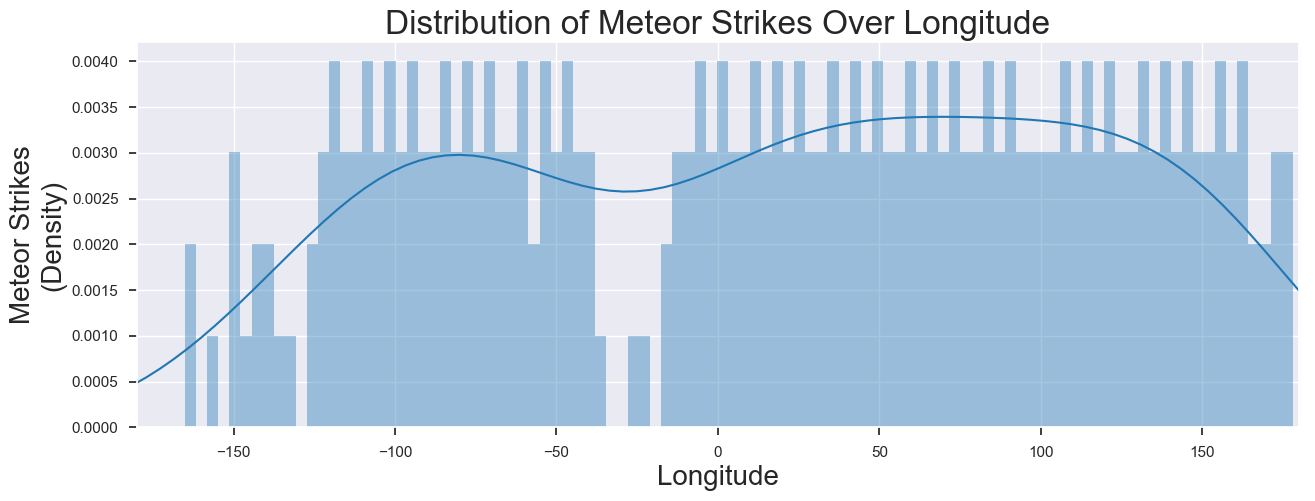

In [16]:
strike_long = strike_long.groupby('reclong').sum()

plt.figure(figsize=(15, 5))

# strike_long = strike_long[(strike_long.fall < 5000) & (strike_long.fall > 1)]
# strike_long.sort_values(by="fall", ascending=False)
# plt.hist(x=strike_long.index, bins=100)
sns.distplot(strike_long.index, bins=100, hist=True)

plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Meteor Strikes\n(Density)", fontsize=20)
plt.xlim([-180, 180])
plt.title("Distribution of Meteor Strikes Over Longitude", fontsize=24)
plt.show()

In [17]:
earth = gpd.read_file("custom.geo.json")

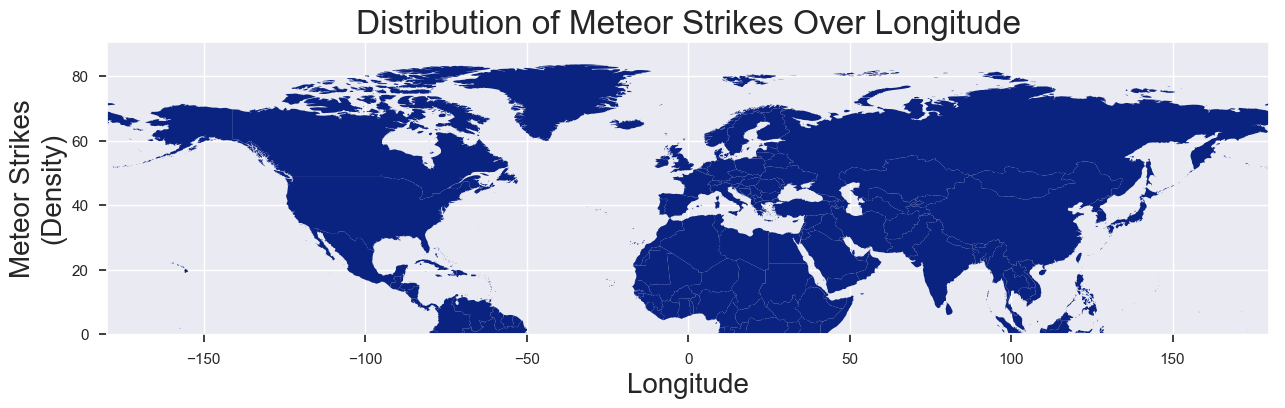

In [20]:
strike_long = strike_long.groupby('reclong').sum()

#plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, figsize=(15,5))
base = earth.plot(ax=ax, color='#0B2380')

# strike_long = strike_long[(strike_long.fall < 5000) & (strike_long.fall > 1)]
# strike_long.sort_values(by="fall", ascending=False)
# plt.hist(x=strike_long.index, bins=100)
sns.distplot(strike_long.index, bins=100, hist=True, ax=base)

plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Meteor Strikes\n(Density)", fontsize=20)
plt.xlim([-180, 180])
plt.title("Distribution of Meteor Strikes Over Longitude", fontsize=24)

plt.show()